In [1]:
import numpy as np 
from PIL import Image

# Implementação de convolução

In [2]:
def convolve(img: Image, kernel: np.array, return_array: bool = False) -> Image:

    k = kernel.shape[0]
    assert k % 2 != 0
    pad = k // 2

    img_array = np.asarray(img)
    # Complementando a imagem com zeros para facilitar a implementação
    img_array = np.pad(img_array, pad, mode="constant", constant_values=0)
    output_array = np.zeros(shape=(img.size[1], img.size[0]))

    for i in range(img.size[1]):
        for j in range(img.size[0]):

            target = img_array[i:i+k, j:j+k]
            output_array[i, j] = np.multiply(kernel, target).sum()

    # Certificando que os limites não sejam ultrapassados
    output_array = np.minimum(255, output_array)
    output_array = np.maximum(0, output_array)
    output_array = np.uint8(output_array)

    return output_array if return_array else Image.fromarray(output_array, mode="L")


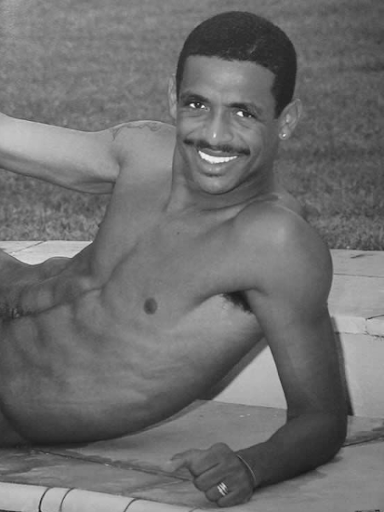

In [3]:
demo = Image.open("data/vamp.png").convert("L")
demo

In [4]:
# Kernel de média
kernel = np.array(
    [
        [1/9,1/9,1/9],
        [1/9,1/9,1/9],
        [1/9,1/9,1/9]
    ]
)

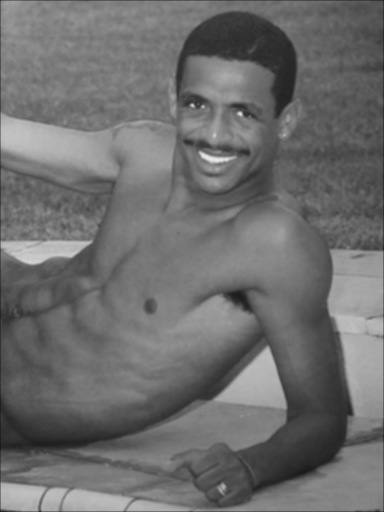

In [5]:
convolve(demo, kernel)

In [6]:
# Kerneis simples de detecção de bordas
# kernel = np.array(
#     [
#         [1, 0, -1],
#         [0,0,0],
#         [-1,0,1]
#     ]
# )

# kernel = np.array(
#     [
#         [0, -1, 0],
#         [-1,4,-1],
#         [0,-1,0]
#     ]
# )

kernel = np.array(
    [
        [-1, -1, -1],
        [-1,8,-1],
        [-1,-1,-1]
    ]
)

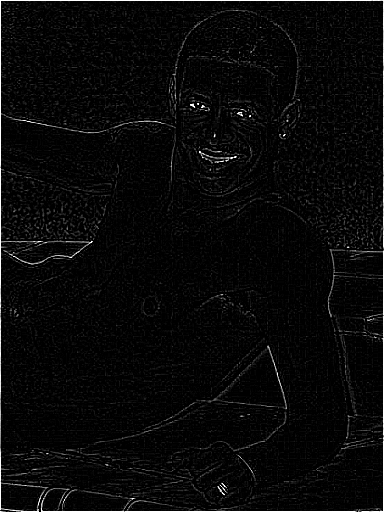

In [7]:
convolve(demo, kernel)


# Aplicando bordas de Sobel

In [8]:
# Bordas de Sobel
kernel = np.array(
    [
        [-1,-2,-1],
        [0,0,0],
        [1,2,1]
    ]
)

# kernel = np.array(
#     [
#         [-1,0,1],
#         [-2,0,2],
#         [-1,0,1]
#     ]
# )

# # Derivadas
# kernel = np.array(
#     [
#         [-1,0,1],
#         [-1,0,1],
#         [-1,0,1]
#     ]
# )

In [9]:
def apply_sobel_border_detection(img: Image) -> Image:

    # Bordas de Sobel
    kernel1 = np.array(
        [
            [ 1, 2, 1],
            [ 0, 0, 0],
            [-1,-2,-1]
        ]
    )

    kernel2 = np.array(
        [
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]
        ]
    )

    i_x = convolve(img, kernel1, return_array=True)
    i_y = convolve(img, kernel2, return_array=True)

    output_array = np.sqrt(
        np.square(i_x) + np.square(i_y)
    )

    output_array = (255/output_array.max()) * output_array

    # output_array = np.minimum(255, output_array)
    # output_array = np.maximum(0, output_array)
    # output_array = np.uint8(output_array)

    return Image.fromarray(np.uint8(output_array), mode="L")

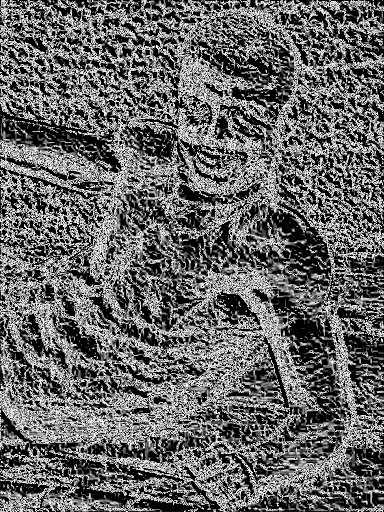

In [10]:
apply_sobel_border_detection(demo)

# Filtros Gaussianos

In [11]:
def simple_gaussian(sigma: float, x: int, y: int) -> float:
    # Gaussiana bidimensional com médias iguais a zero e desvios iguais
    return 1/(2*np.pi*sigma*sigma) * np.exp(-(x*x + y*y)/(2*sigma*sigma))

def generate_gaussian_kernel(k: int, sigma: float) -> np.array:

    offset = k//2
    kernel = np.zeros((k, k))

    for j in range(k):
        for i in range(k):
            kernel[i,j] = simple_gaussian(sigma, i-offset, j-offset)

    return kernel




In [12]:
gaussian_kernel = generate_gaussian_kernel(5, 2)

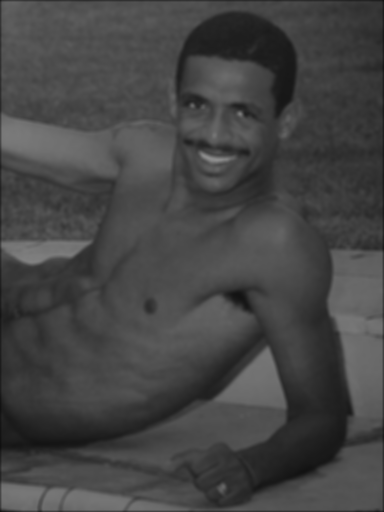

In [13]:
convolve(demo, gaussian_kernel)

# Aplicando os filtros implementados

## Remoção de ruído

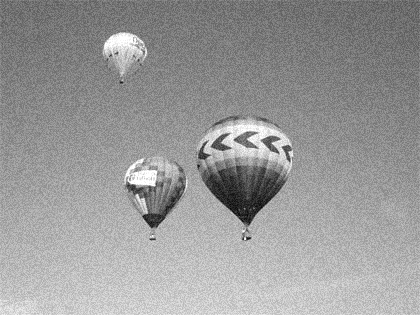

In [14]:
noisy = Image.open("data/filtros/noisy.jpg")
noisy

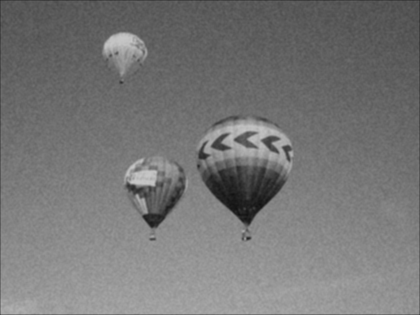

In [15]:
sigma = 1
k = 2*sigma + 1

kernel = generate_gaussian_kernel(k, sigma)

convolve(noisy, kernel)

## Detecção de borda

In [16]:
building = Image.open("data/filtros/building.jpg")

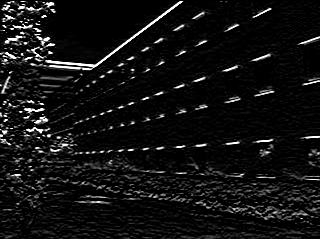

In [17]:
# Sobel horizontal
kernel_h = np.array(
    [
        [ 1, 2, 1],
        [ 0, 0, 0],
        [-1,-2,-1]
    ]
)
convolve(building, kernel_h)

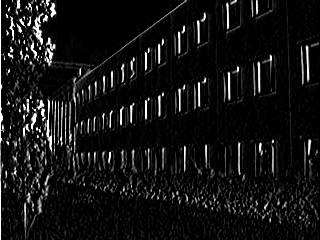

In [18]:
# Sobel horizontal
kernel_v = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
)
convolve(building, kernel_v)

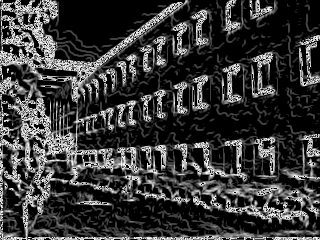

In [35]:
# Kerneis horizontal e vertical combinados
building = Image.open("data/filtros/building.jpg")
kernel = generate_gaussian_kernel(5, 3)
building = convolve(building, kernel)
apply_sobel_border_detection(building)